https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/02_deeplearning/02_cnn/convolutions.ipynb

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, utils
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

# 다층퍼셉트론

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [18]:
num_classes = 10

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [19]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [7]:
# 기본적인 연속형 형태의 모델
model = models.Sequential(
                            [
                                layers.Flatten(input_shape = (32, 32, 3)),
                                layers.Dense(200, activation = 'relu'),
                                layers.Dense(150, activation = 'relu'),
                                layers.Dense(10, activation = 'softmax')
                            ]
)

- Input : 네트워크의 시작점. 입력 데이터의 크기를 튜플을 통해 알려준다.
- Flatten : 입력된 데이터를 하나의 벡터로 펼치는 단계(펼친다고 하여 flatten이라고 한다.)
- Dense : 기본적인 신경망 구성 요소

In [8]:
# Sequentail을 사용하지 않고, 함수형 API를 통해 모델 생성
# 기본적인 형태는 비슷하다.
input_layer = layers.Input(shape = (32, 32, 3))
x = layers.Flatten()(input_layer)
# x = layers.Dense(units = 200, activation = 'relu')(x) # 활성화 함수를 분리하여 작성할 수 있다.
x = layers.Dense(units = 200)(x)
x = layers.Activation('relu')(x)
x = layers.Dense(units = 150, activation = 'relu')(x)
output_layer = layers.Dense(units = 10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable

In [10]:
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

손실함수

- rmse : 회귀 문제의 경우 평균 제곱 오차 손실을 계산
- categorical_crossentropy : 범주형 분류 문제
- binary_crossentropu : 이진 분류 문제

In [11]:
model.fit(X_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8483 - accuracy: 0.3350
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6712 - accuracy: 0.4042
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5938 - accuracy: 0.4305
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5383 - accuracy: 0.4527
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5009 - accuracy: 0.4630
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4688 - accuracy: 0.4762
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4408 - accuracy: 0.4869
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4142 - accuracy: 0.4957
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3936 - accuracy: 0.5022
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [12]:
model.evaluate(X_test, y_test) # 48퍼센트의 정확도

313/313 [==============================] - 2s 5ms/step - loss: 1.4236 - accuracy: 0.4963


[1.4236197471618652, 0.49630001187324524]

In [13]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'fog', 'horse', 'ship', 'truck'])

preds = model.predict(X_test)
preds_single = classes[np.argmax(preds, axis = -1)] # np.argmax() >>> 가장 큰 원소의 인덱스 반환 (가장 확률이 높은 값의 인덱스를 반환)
actual_single = classes[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 6ms/step


In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35,
            'pred = ' + str(preds_single[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.text(0.5, -0.7,
            'pred = ' + str(actual_single[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.imshow(img)

# 합성곱 신경망

In [6]:
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

### 필터 예제

(64, 64)


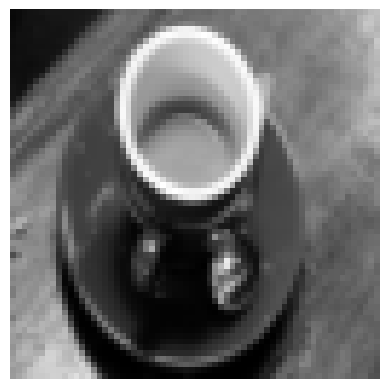

In [9]:
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis('off')
plt.imshow(im, cmap = 'gray')

### 합성곱 층 쌓기

In [10]:
input_layer = layers.Input(shape = (32, 32, 3))
conv_layer_1 = layers.Conv2D(
                                filters = 10, # filter의 갯수 / 이 층을 거치고 나면 필터의 갯수만큼 특성층이 생기는 것
                                kernel_size = (4, 4), # filter의 크기
                                strides = 2,
                                padding = 'same'
                            )(input_layer)
conv_layer_2 = layers.Conv2D(
                                filters = 20,
                                kernel_size = (3, 3),
                                strides = 2,
                                padding = 'same'
                            )(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units = 10, activation = 'softmax')(flatten_layer)

model = models.Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


### 배치정규화와 드롭아웃

In [12]:
layers.BatchNormalization(momentum = 0.9)

In [13]:
layers.Dropout(rate = 0.25)

### CNN 모델링

In [14]:
input_layer = layers.Input(shape = (32, 32, 3))
x = layers.Conv2D(
                    filters = 32, # filter의 갯수 / 이 층을 거치고 나면 필터의 갯수만큼 특성층이 생기는 것
                    kernel_size = (3, 3), # filter의 크기
                    strides = 1,
                    padding = 'same'
                )(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(
                    filters = 32,
                    kernel_size = (3, 3),
                    strides = 2,
                    padding = 'same'
                )(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(
                    filters = 64,
                    kernel_size = (3, 3),
                    strides = 1,
                    padding = 'same'
                )(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(
                    filters = 64,
                    kernel_size = (3, 3),
                    strides = 2,
                    padding = 'same'
                )(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

In [15]:
opt = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [20]:
model.fit(X_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5618 - accuracy: 0.4513
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1570 - accuracy: 0.5920
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0038 - accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9198 - accuracy: 0.6773
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8530 - accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8047 - accuracy: 0.7185
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7579 - accuracy: 0.7354
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7216 - accuracy: 0.7461
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6864 - accuracy: 0.7605
Epoch 10/10
1563/1563 [==============================] - 33s 21m

In [21]:
model.evaluate(X_test, y_test, batch_size = 1000)

10/10 [==============================] - 1s 98ms/step - loss: 0.8147 - accuracy: 0.7191


[0.8146544694900513, 0.7190999984741211]